In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme (color_codes=True)

In [37]:
df=pd.read_csv('NYRealstatePricing.csv')
df.head()

,F1,id,neighbourhood,latitude,longitude,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
0,0,2595,Midtown,40.75362,-73.98377,Entire home/apt,225,15,10,48,0.39,1
1,1,3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89,188,1,295,4.67,1
2,2,5099,Manhattan,40.74767,-73.97500,Entire home/apt,200,362,3,78,0.60,19
3,3,5121,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,0,29,49,0.38,365
4,4,5178,Manhattan,40.76489,-73.98493,Private room,79,141,2,454,3.52,242


In [38]:
df.select_dtypes(include='object').nunique()

neighbourhood    186
room_type          4
dtype: int64

In [39]:
df.shape

(17614, 12)

In [40]:
df.neighbourhood.unique()

array(['Midtown', 'Brooklyn', 'Manhattan', 'Bedford-Stuyvesant',
       'Lower East Side', 'Park Slope', 'Williamsburg', 'East Village',
       'Harlem', 'Hamilton Heights', 'Bushwick', 'Alphabet City',
       'Flatbush', 'Long Island City', 'Clinton Hill', 'Fort Greene',
       'Upper West Side', 'Greenpoint', 'Kips Bay', "Hell's Kitchen",
       'East Harlem', 'Queens', 'Meatpacking District',
       'Brooklyn Heights', 'Prospect Heights', 'Chelsea',
       'Carroll Gardens', 'West Village', 'Gowanus', 'Lefferts Garden',
       'Flatlands', 'Kew Garden Hills', 'Upper East Side', 'Sunnyside',
       'DUMBO', 'Staten Island', 'Highbridge', 'Ridgewood', 'Jamaica',
       'Middle Village', 'Cobble Hill', 'Roosevelt Island', 'Soho',
       'West Brighton', 'Eastchester', 'Crown Heights',
       'Morningside Heights', 'Chinatown', 'Red Hook',
       'Kingsbridge Heights', 'The Rockaways', 'Midtown East',
       'Forest Hills', 'The Bronx', 'Washington Heights', 'Astoria',
       'Baycheste

In [41]:

# Define the conditions for each segment
manhattan = ['Midtown', 'Lower East Side', 'East Village', 'Harlem', 'Hamilton Heights', 'Alphabet City', 'Upper West Side', 'Kips Bay', "Hell's Kitchen", 'Upper East Side', 'Soho', 'Washington Heights', 'Gramercy Park', 'Financial District', 'Greenwich Village', 'Flatiron District', 'Inwood']
brooklyn = ['Bedford-Stuyvesant', 'Park Slope', 'Williamsburg', 'Bushwick', 'Flatbush', 'Clinton Hill', 'Fort Greene', 'Greenpoint', 'Carroll Gardens', 'Gowanus', 'Lefferts Garden', 'Brooklyn Heights', 'Prospect Heights', 'DUMBO', 'Cobble Hill', 'Windsor Terrace', 'Greenwood Heights', 'Boerum Hill', 'Borough Park', 'Canarsie', 'Columbia Street Waterfront']
queens = ['Long Island City', 'Astoria', 'Sunnyside', 'Jamaica', 'Ridgewood', 'Flushing', 'Ditmars / Steinway', 'Jackson Heights', 'South Beach', 'College Point', 'Country Club', 'East Elmhurst']
bronx = ['Highbridge', 'Baychester', 'Fordham', 'Kingsbridge Heights', 'Morris Heights', 'Concourse', 'Concourse Village', 'Melrose', 'Mount Eden', 'University Heights', 'Norwood', 'Hunts Point', 'Spuyten Duyvil']
staten_island = ['West Brighton', 'Rosebank', 'Stapleton', 'Graniteville', 'Tottenville', 'Annadale', 'Dongan Hills', 'Randall Manor', 'Concord', 'Van Nest']
# Define a function that returns the segment based on the neighbourhood
def segment_neighborhood (neighbourhood):
    if neighbourhood in manhattan:
        return 'Manhattan'
    elif neighbourhood in brooklyn:
        return 'Brooklyn'
    elif neighbourhood in queens:
        return 'Queens'
    elif neighbourhood in bronx:
        return 'Bronx'
    elif neighbourhood in staten_island:
        return 'Staten Island'
    else:
        return 'Other'

In [42]:
df['neighbourhood']=df['neighbourhood'].apply(segment_neighborhood)

<Axes: xlabel='neighbourhood'>

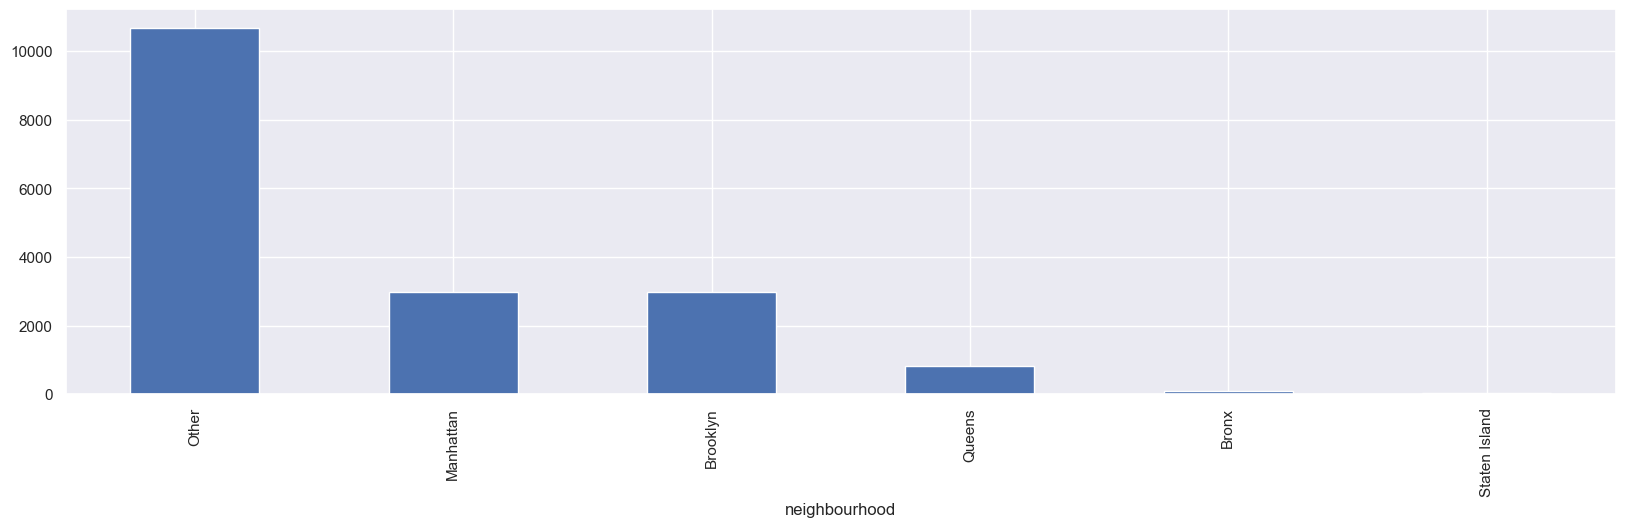

In [43]:
plt.figure(figsize=(20,5))
df['neighbourhood'].value_counts().plot(kind='bar')
#unique values

In [44]:
df.drop(columns=['latitude', 'longitude', 'F1', 'id'],inplace=True)
df.head()

,neighbourhood,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
0,Manhattan,Entire home/apt,225,15,10,48,0.39,1
1,Other,Entire home/apt,89,188,1,295,4.67,1
2,Other,Entire home/apt,200,362,3,78,0.60,19
3,Brooklyn,Private room,60,0,29,49,0.38,365
4,Other,Private room,79,141,2,454,3.52,242


In [45]:
df.shape

(17614, 8)

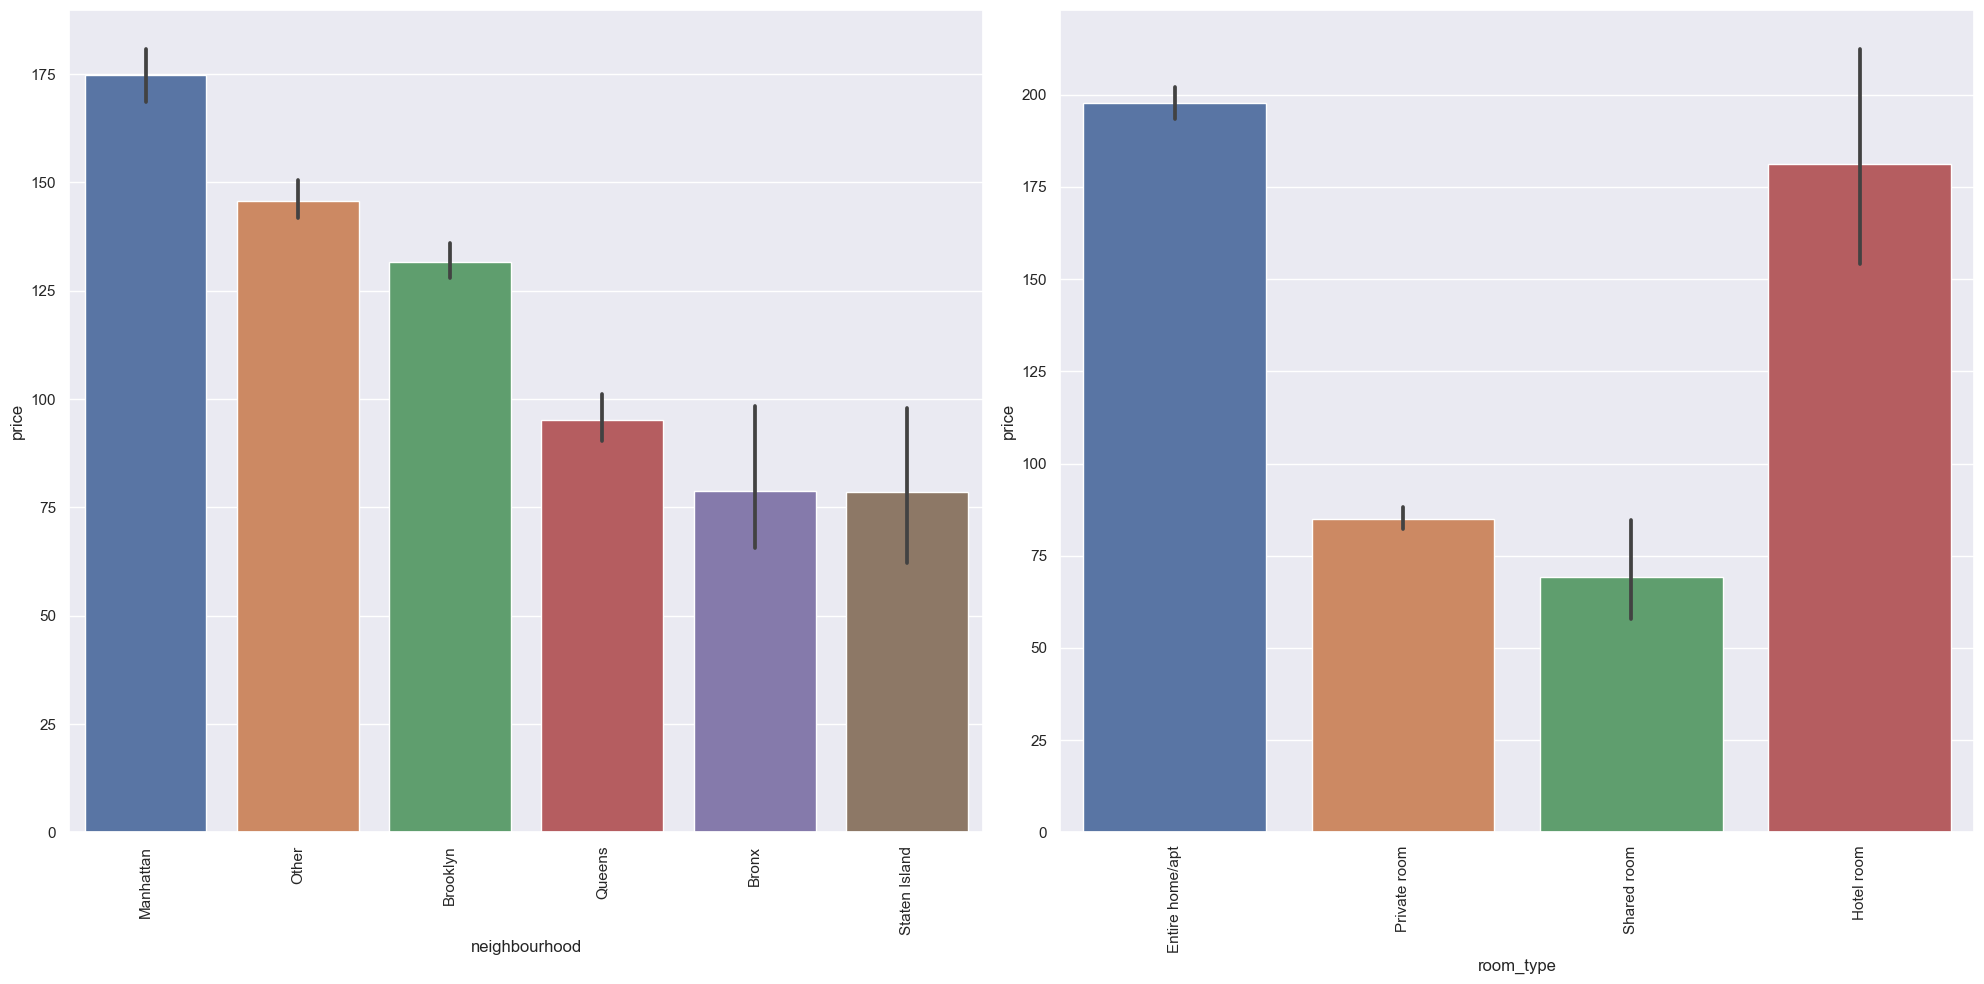

In [46]:

# List of categorical variables to plot
cat_vars=['neighbourhood', 'room_type']
# create figure with subplots
fig, axs =plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs=axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate (cat_vars):
    sns.barplot(x=var, y='price', data=df, ax=axs[i])
    axs[i].set_xticklabels (axs[i].get_xticklabels (), rotation=90)

# adjust spacing between subplots
fig.tight_layout()
# show plot
plt.show()

https://seaborn.pydata.org/archive/0.11/generated/seaborn.barplot.html

A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.

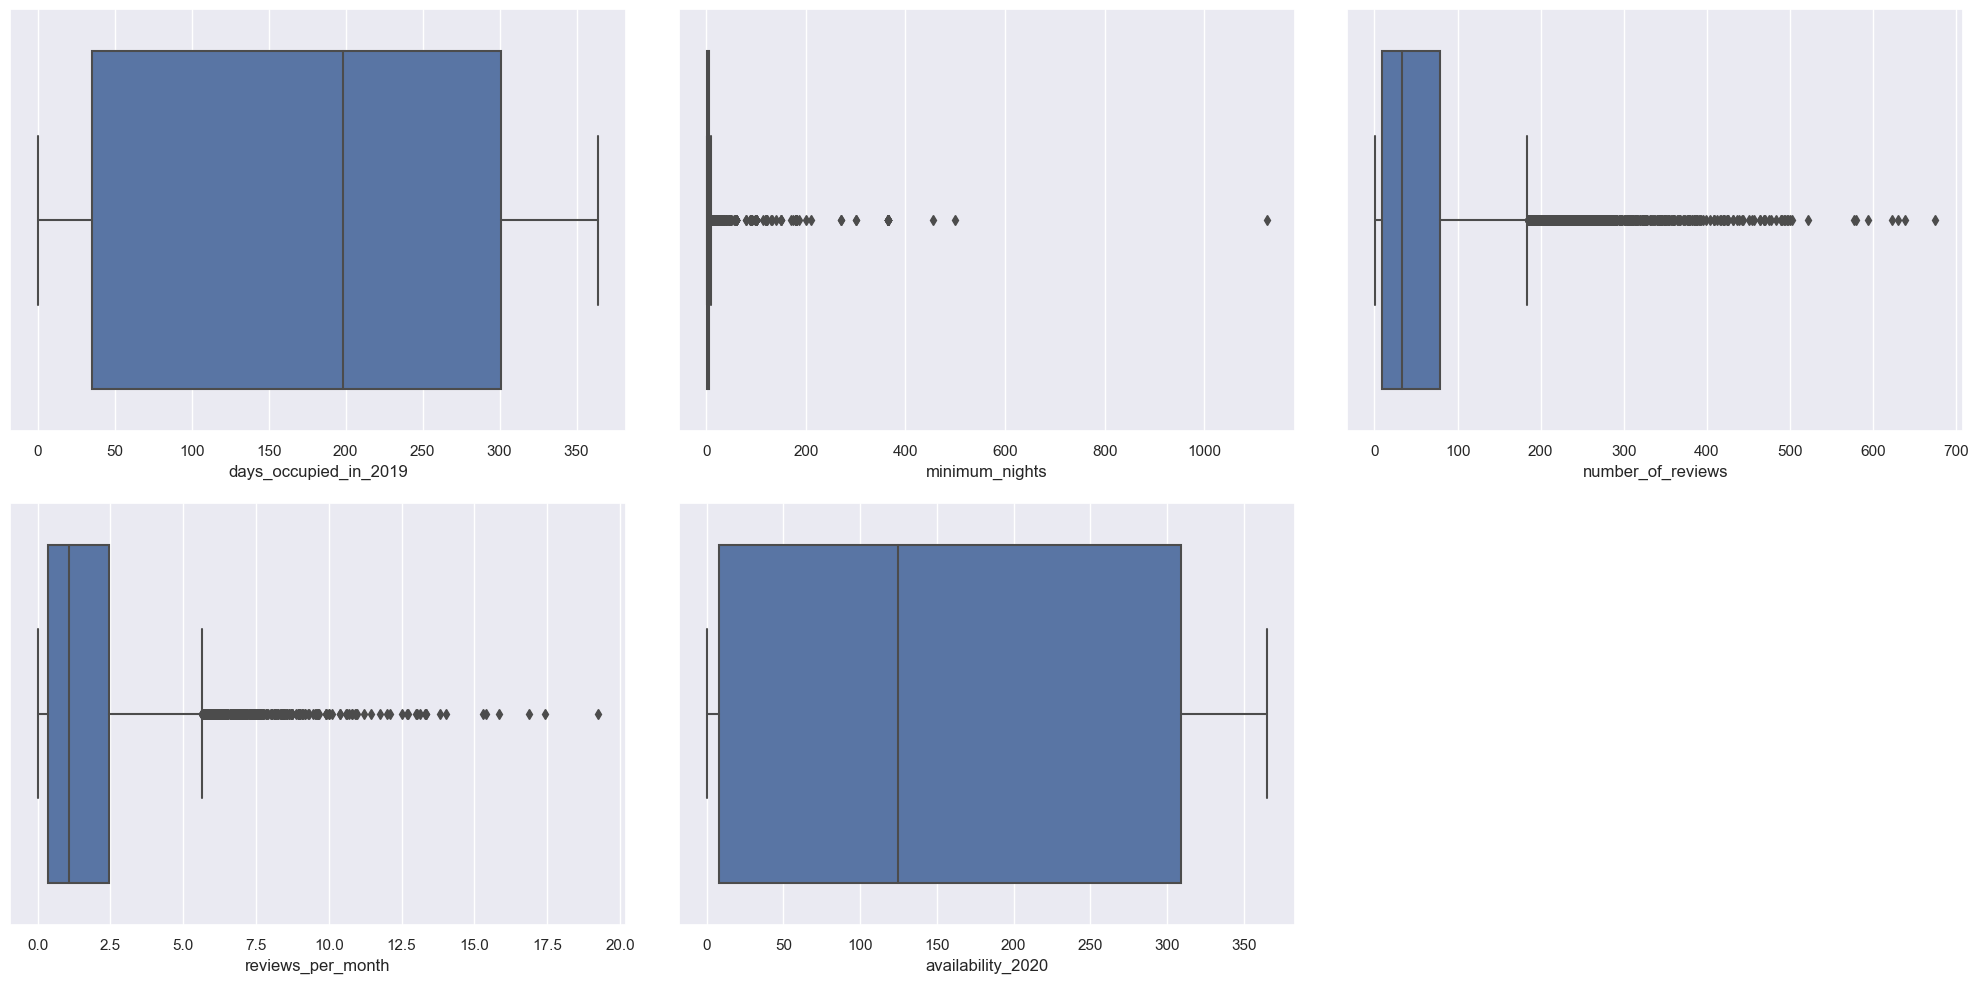

In [47]:

num_vars =['days_occupied_in_2019', 'minimum_nights','number_of_reviews', 'reviews_per_month', 'availability_2020']
fig, axs = plt.subplots (nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()
#Show the boxplot
for i, var in enumerate (num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])
# adjust spacing between subplots
fig.tight_layout()
# remove the sixth subplot
fig.delaxes (axs [5])
plt.show()

https://seaborn.pydata.org/archive/0.11/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot
Box: The middle part of the plot is a box. The box represents the middle 50% of the data, from the 25th percentile (Q1) to the 75th percentile (Q3). In other words, it shows where most of the scores are concentrated.

Line in the Box (Median): Inside the box, there's a line that represents the median, which is the middle value of the dataset when it's arranged in order. This line shows the "typical" value in the dataset.

Whiskers: Lines extend from the box, known as whiskers. These lines show how far the data stretches from the box. The whiskers typically extend up to a certain distance, often 1.5 times the interquartile range (IQR). The IQR is the range between the 75th and 25th percentiles.

Outliers: Points that are outside the whiskers are called outliers. These are values that are much higher or much lower than the rest of the data. Outliers can be important to spot because they might represent unusual or extreme cases.

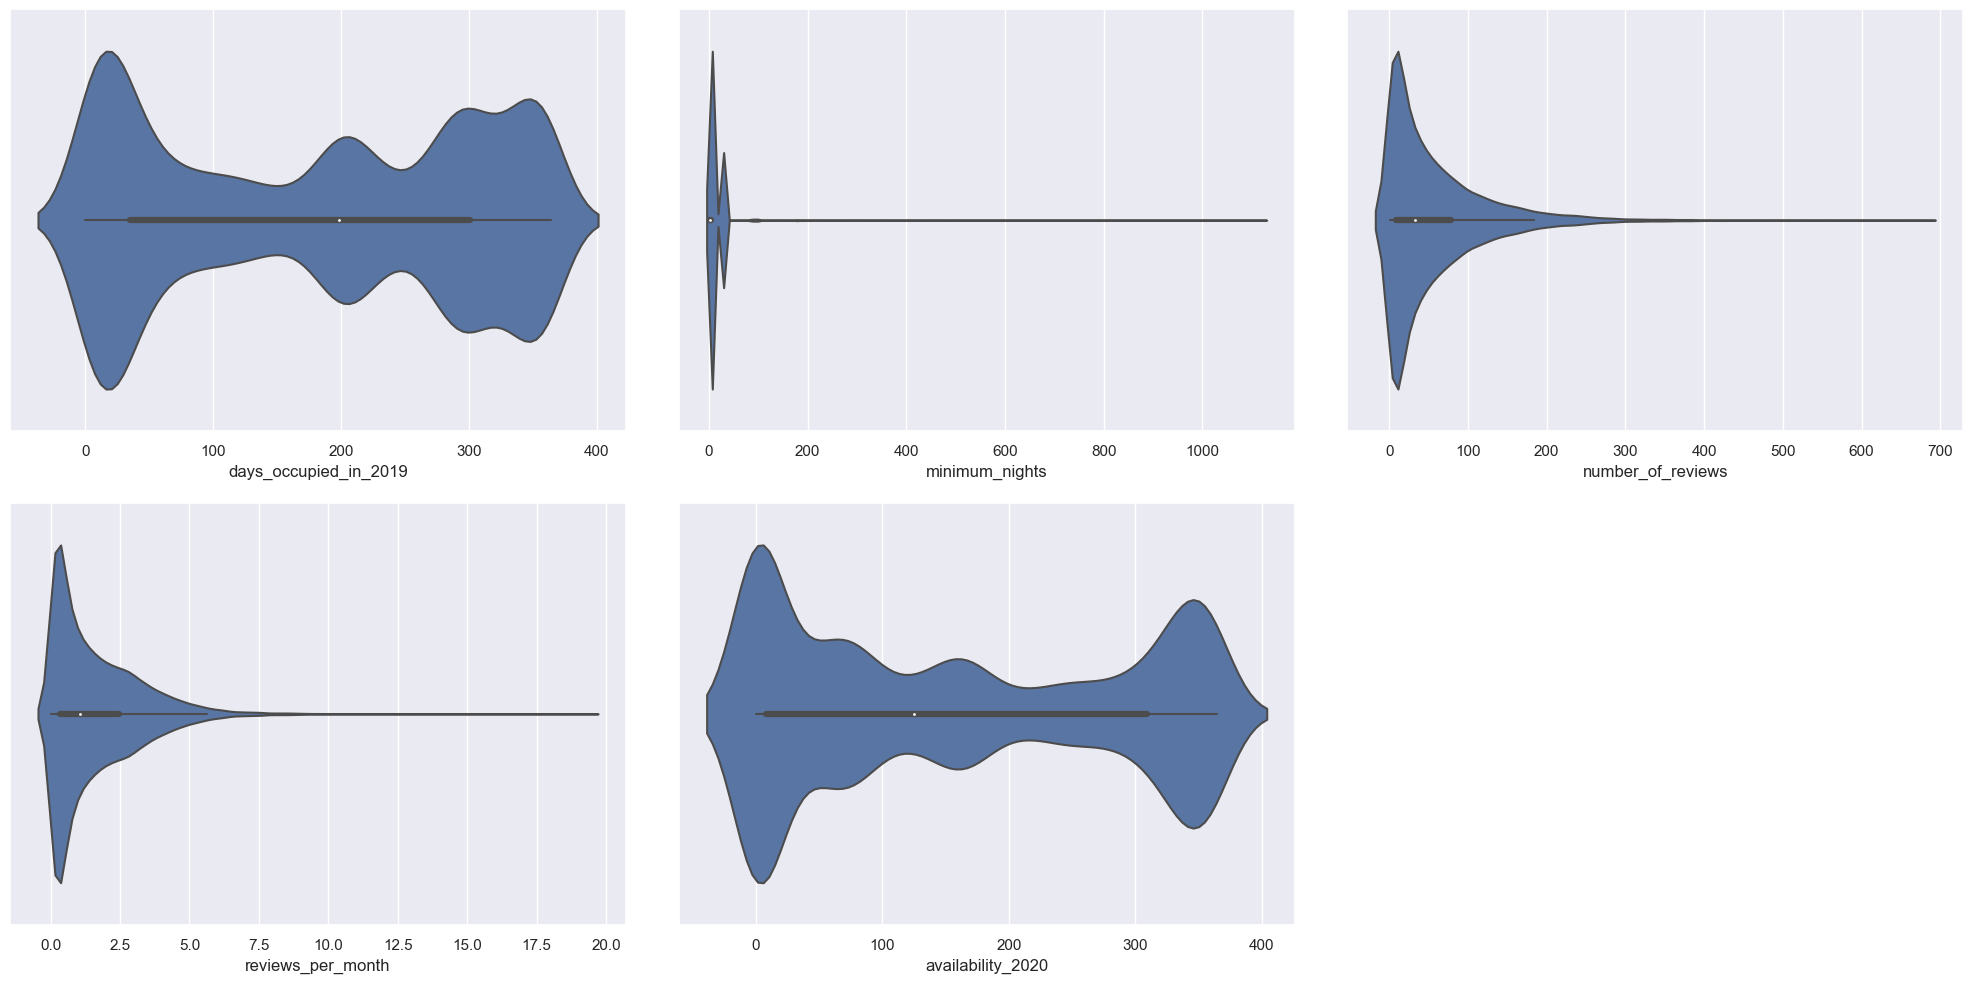

In [48]:

num_vars =['days_occupied_in_2019', 'minimum_nights','number_of_reviews', 'reviews_per_month', 'availability_2020']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()
for i, var in enumerate (num_vars):
    sns.violinplot (x=var, data=df, ax=axs[i])
fig.tight_layout()
# remove the sixth subplot
fig.delaxes (axs[5])
plt.show()

Shape: A violin plot looks like a combination of a mirrored violin and a box plot. It has a central "violin" shape that's symmetrical along a vertical line. This shape represents the distribution of the data.

Width: The width of the violin at any point shows how many data points have values around that point. A wider section means more data points have scores there.

Color or Shading: You might see different colors or shading inside the violin. This can represent the density of data points at different values. Darker areas indicate more points.

Center Line: Inside the violin, there's often a line that shows the median value. This gives you an idea of the typical value in the dataset.

Tips: The tips or endpoints of the violin extend to show the minimum and maximum values of the data.

By looking at a violin plot, you can quickly understand the overall shape of the data's distribution. If it's wider in certain areas, that's where most of the scores are. If there are narrow sections, fewer scores fall there. And if there are outliers or extreme values, you'll be able to see them too.

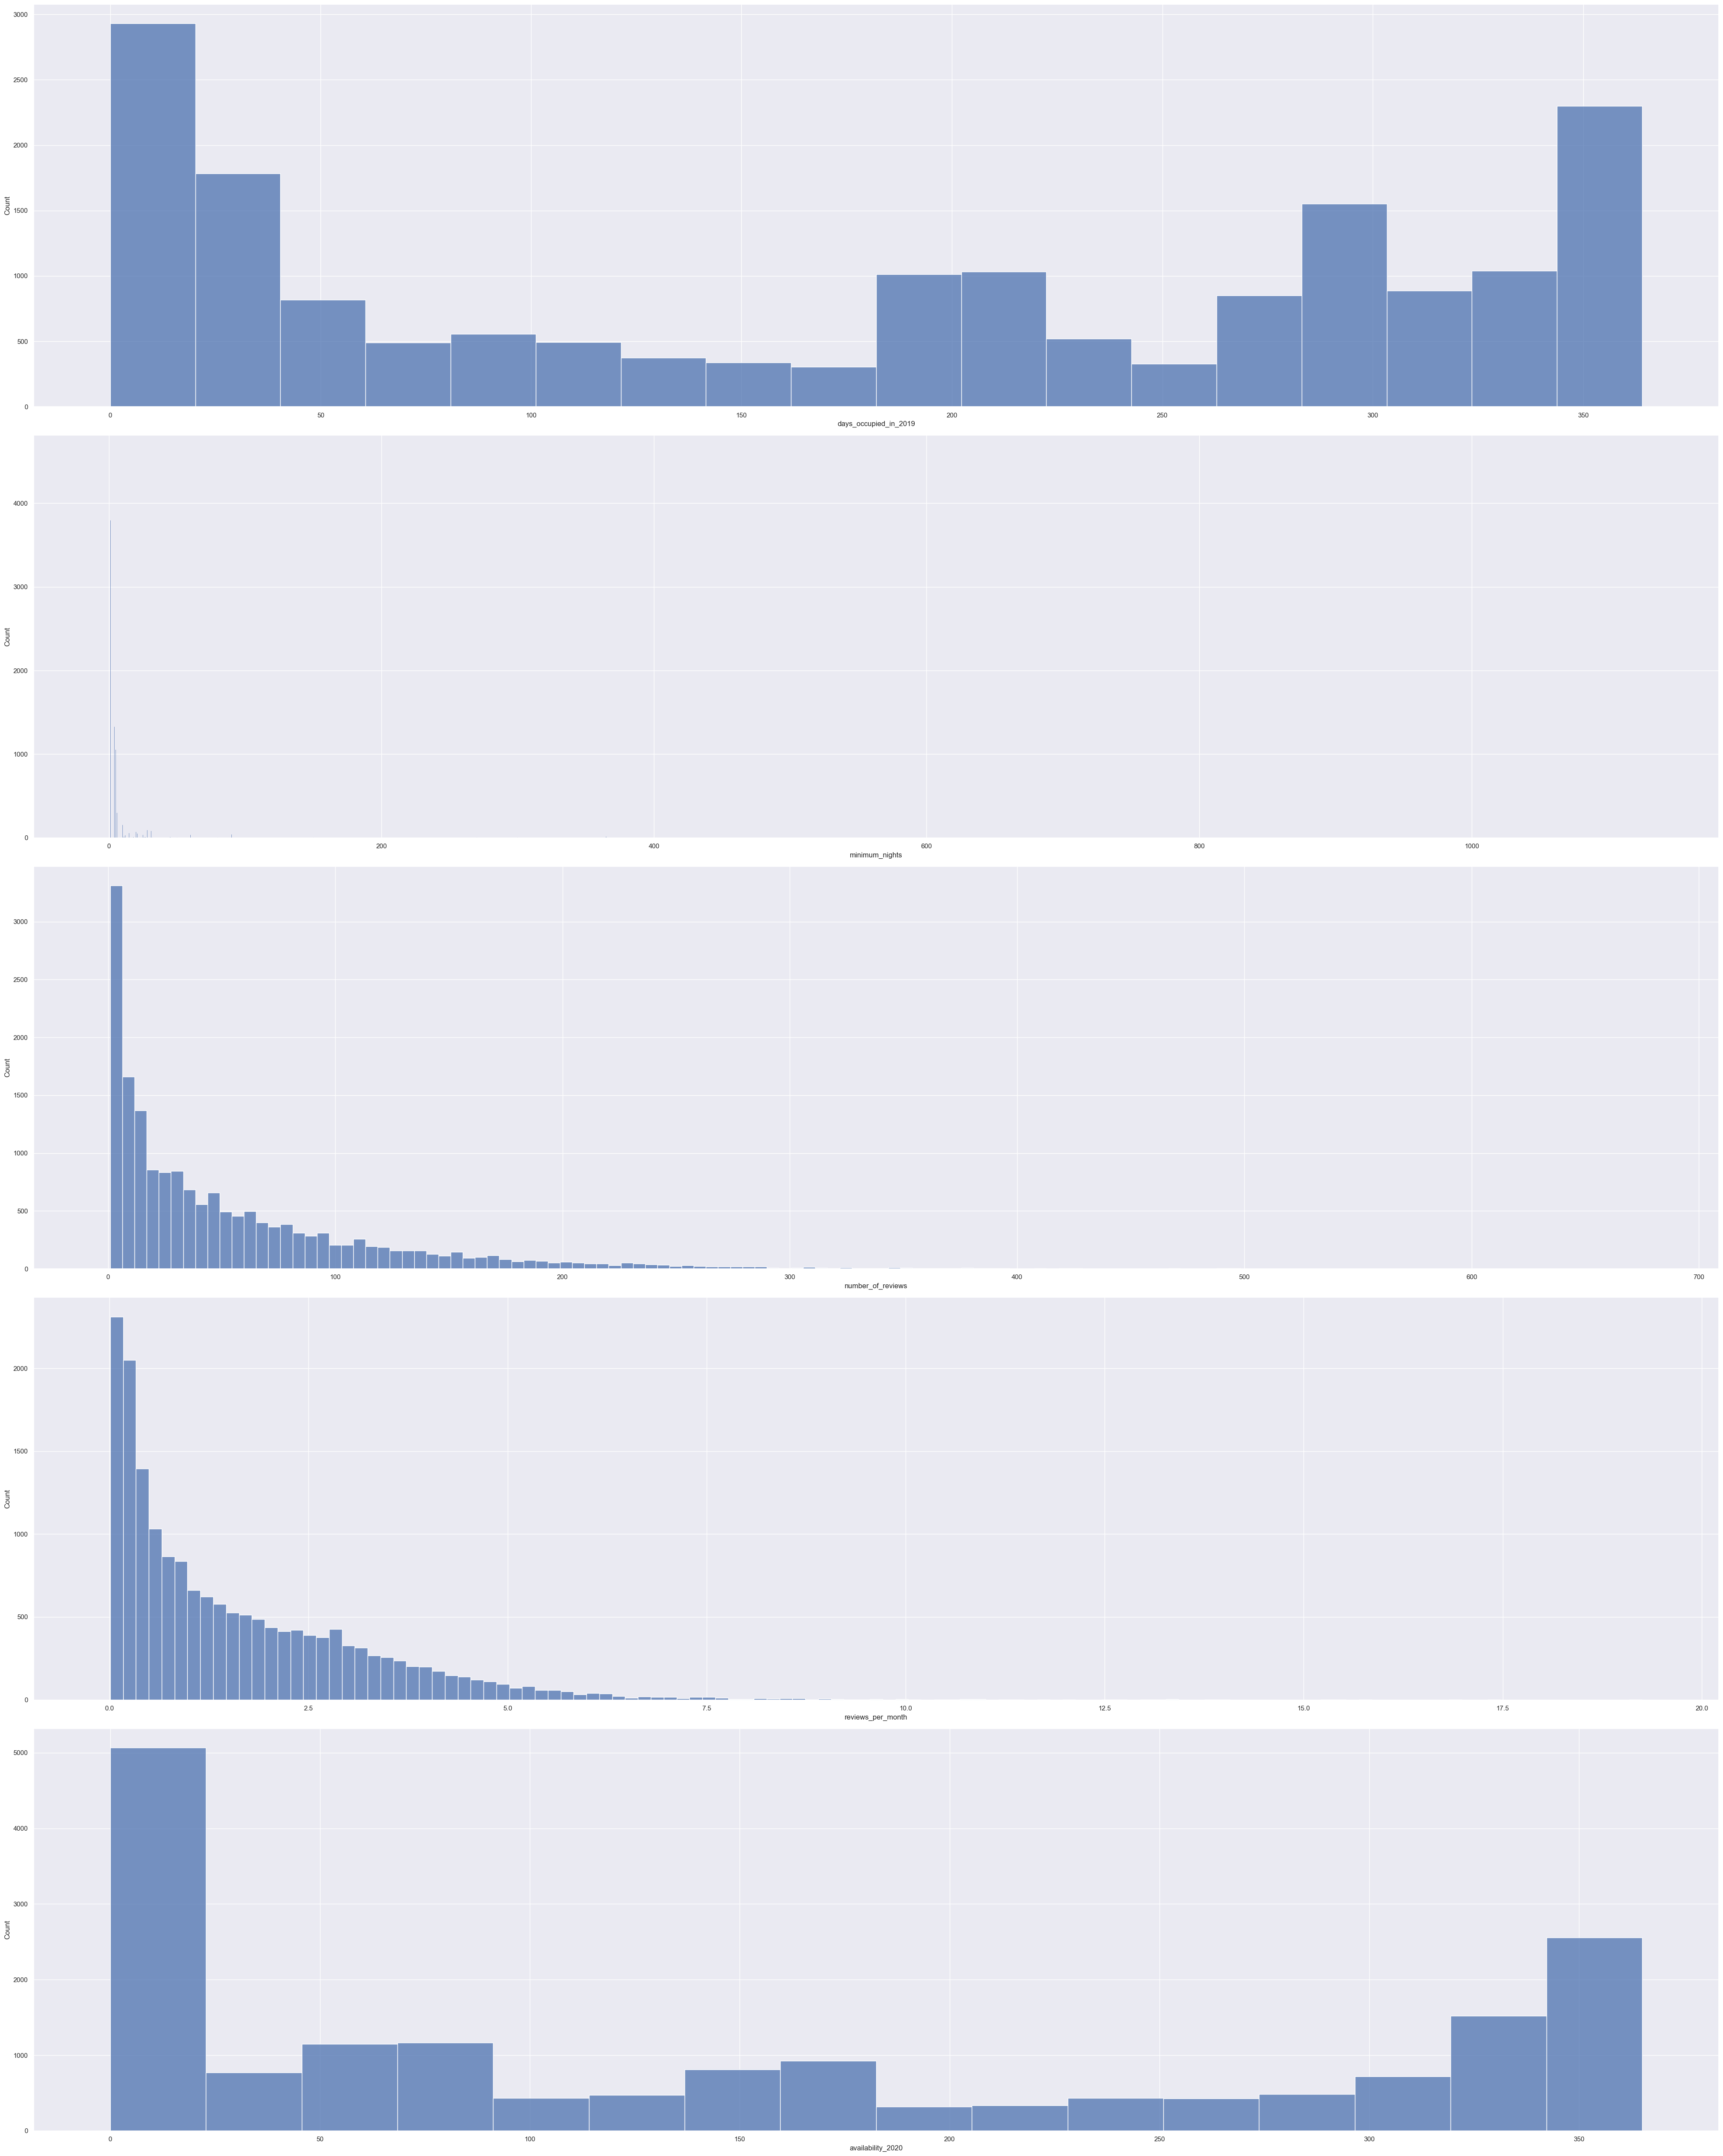

In [49]:
num_vars =['days_occupied_in_2019', 'minimum_nights','number_of_reviews', 'reviews_per_month', 'availability_2020']
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(40,50))
axs = axs.flatten()
for i, var in enumerate (num_vars):
    sns.histplot (x=var, data=df, ax=axs[i])
fig.tight_layout()
# remove the sixth subplot
#fig.delaxes (axs[5])
plt.show()

Bars: A histplot is made up of a bunch of rectangles, or bars, stacked next to each other. Each bar represents a range of values. For example, one bar might represent ages from 20 to 30, another from 30 to 40, and so on.

Height: The height of each bar shows how many data points fall within that range. If a lot of people in your group are in their 20s, the bar for ages 20-30 will be taller.

X-Axis: The horizontal axis (the bottom line) of the histplot shows the range of values. Each bar corresponds to a certain range on the x-axis.

Y-Axis: The vertical axis (the side line) shows the count of data points in each range. The higher a bar goes, the more data points are in that range.

Gaps: Sometimes there might be gaps between the bars. This usually means that there are no data points in those ranges.

In essence, a histplot helps you see at a glance where the majority of your data falls and if there are any gaps or outliers. It's like a visual summary of how your data is distributed.


In [50]:
# #EXAMPLE

# import pandas as pd

# # Example DataFrame with some missing values
# data = {
#     'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
#     'Age': [22, 24, None, 20, 23],
#     'Score': [85, None, 70, 92, None],
#     'Grade': ['A', 'B', 'C', None, 'A']
# }

# df = pd.DataFrame(data)

# # Calculate the percentage of missing values for each column
# check_missing = df.isnull().sum() * 100 / df.shape[0]
# print(check_missing)
# # Filter and sort the columns with missing values
# missing_columns = check_missing[check_missing > 0].sort_values(ascending=False)

# print(missing_columns)


In [51]:
#Check the missing value
check_missing = df.isnull().sum() *100/df.shape[0]
check_missing [check_missing> 0].sort_values (ascending=False)
print(check_missing)

neighbourhood            0.0
room_type                0.0
price                    0.0
days_occupied_in_2019    0.0
minimum_nights           0.0
number_of_reviews        0.0
reviews_per_month        0.0
availability_2020        0.0
dtype: float64


In [52]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes (include=['object']).columns:
# Print the column name and the unique values
    print(f" {col}: {df[col].unique()}")

 neighbourhood: ['Manhattan' 'Other' 'Brooklyn' 'Queens' 'Bronx' 'Staten Island']
 room_type: ['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']


Label Encoding is a technique used in machine learning to convert categorical data into numerical form. It assigns a unique numerical label to each category in a categorical variable, which allows machine learning algorithms to work with this data more effectively. Label Encoding is suitable when the categorical values have an inherent order or ranking.

Mapping Unique Values: The Label Encoder first identifies all the unique categorical values in the column and assigns a unique numerical label to each value. It does this by creating a mapping between the categorical values and their corresponding numerical labels.

Sorting Order: The Label Encoder then sorts the unique categorical values in ascending order. The sorting order is important because it determines how the numerical labels will be assigned.

Assigning Numerical Labels: Starting from 0, the Label Encoder assigns the sorted unique values consecutive numerical labels. The first unique value gets label 0, the second gets label 1, and so on.

Encoding Data: After creating this mapping and assigning numerical labels to the unique values, the Label Encoder applies these labels to the original data. It replaces each categorical value with its corresponding numerical label.

Here's a simple example:

Let's say you have a categorical variable "Size" with the values ['Small', 'Medium', 'Large'].

Label Encoding assigns 'Small' to label 0, 'Medium' to label 1, and 'Large' to label 2.

If you have a dataset with the following values: ['Medium', 'Small', 'Large', 'Medium'], Label Encoding will convert it to: [1, 0, 2, 1].

In [53]:

from sklearn import preprocessing
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes (include=['object']).columns:
# Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
# Fit the encoder to the unique values in the column
    label_encoder.fit(df [col].unique())
# Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
# Print the column name and the unique encoded values
    print(f"{col} {df[col].unique()}")

neighbourhood [2 3 1 4 0 5]
room_type [0 2 3 1]


In [54]:
df.head()

,neighbourhood,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
0,2,0,225,15,10,48,0.39,1
1,3,0,89,188,1,295,4.67,1
2,3,0,200,362,3,78,0.60,19
3,1,2,60,0,29,49,0.38,365
4,3,2,79,141,2,454,3.52,242


In [55]:

# specify the columns to remove outliers from dataframe
column_names = ['minimum_nights', 'number_of_reviews', 'reviews_per_month']
# remove outliers for each selected column using the IQR method
for column_name in column_names:
    Q1=df[column_name].quantile (0.25)
    Q3=df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR)))]


df.head()

,neighbourhood,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
2,3,0,200,362,3,78,0.60,19
5,2,0,150,86,1,161,1.29,1
7,1,2,89,12,4,175,1.35,0
9,1,0,140,319,2,170,1.33,0
11,3,0,99,172,3,75,4.43,63


In [56]:
df.shape

(13869, 8)

plt.figure(figsize=(20, 16)):

This line creates a new figure for the heatmap with a specified figure size of 20 units in width and 16 units in height. The figsize parameter adjusts the dimensions of the output plot.
sns.heatmap(df.corr(), fmt='.2g', annot=True):

sns.heatmap(): This function from the Seaborn library is used to create the correlation heatmap.
df.corr(): This part calculates the correlation coefficients between all pairs of numerical variables in the DataFrame df. It computes the correlation matrix, where each entry represents the correlation between two variables.
fmt='.2g': This parameter sets the format of the values displayed in the cells of the heatmap. The .2g format specifies that numbers should be displayed with two significant digits.
annot=True: This parameter adds annotations (the numerical values) to the cells of the heatmap, displaying the actual correlation coefficients.
The resulting heatmap will visually represent the correlation values between the numerical variables in your DataFrame. Positive correlations will be represented by warmer colors (closer to red), negative correlations by cooler colors (closer to blue), and no correlation by a neutral color (often white or close to it).

<Axes: >

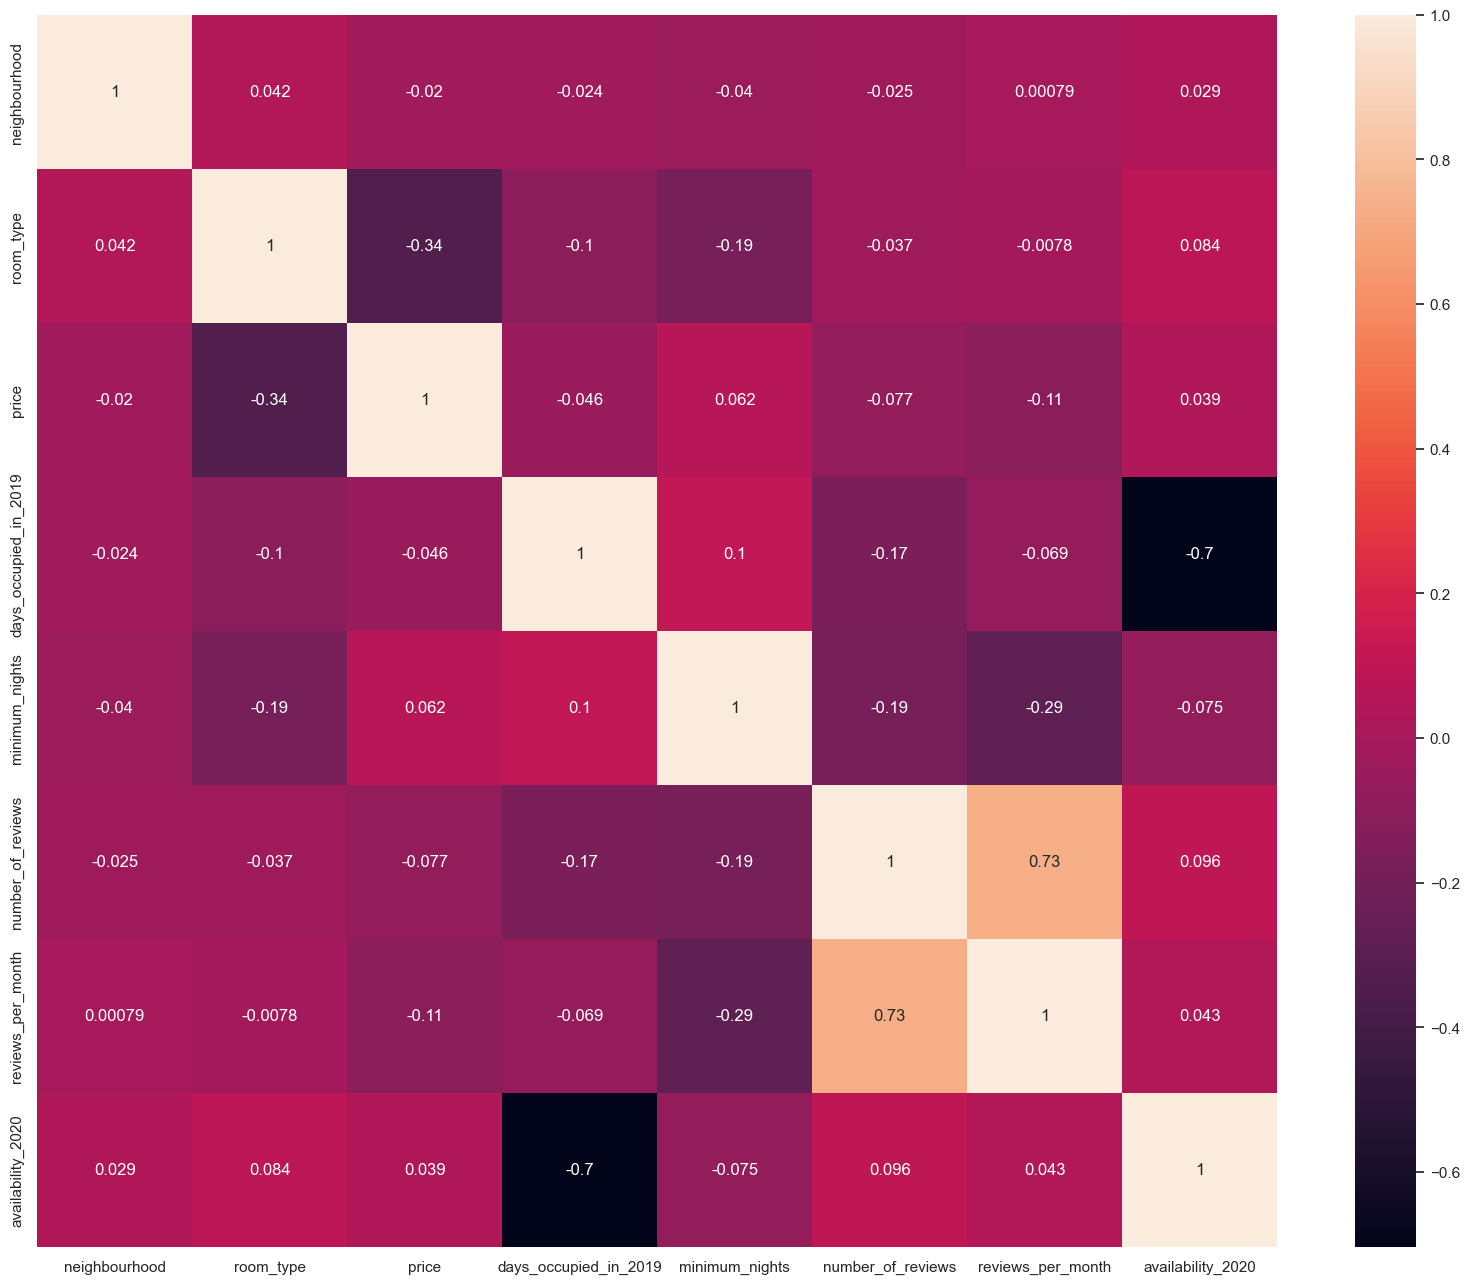

In [57]:
#Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

Color Mapping: Each value in the table is assigned a color based on its magnitude. You define a color scale where colors range from one shade to another. For example, you might choose a scale that goes from light to dark, with light colors representing low values and dark colors representing high values.

Color Intensity: The intensity of the color represents the magnitude of the value. A cell with a higher value will have a darker or more intense color, while a lower value will have a lighter or less intense color.

Gradient Effect: The transition from one color to another creates a gradient effect. This gradient helps you see trends and patterns in the data. For example, you can quickly identify areas with high values, low values, or gradual changes.

Labeling: The rows and columns can be labeled to indicate the variables they represent. This makes it easier to understand which aspects of the data are being compared.


In [58]:
X = df.drop('price', axis=1)
y = df['price']
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_openml


# Load the Boston Housing dataset using fetch_openml
boston = fetch_openml(data_id=506)

X = boston.data
y = boston.target



# Create a DecisionTreeRegressor object
dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [0, 7, 42]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found during grid search
print("Best parameters:", grid_search.best_params_)



The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.


Best parameters: {'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}



960 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
960 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\archi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\archi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\archi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p

In [60]:
dtree=DecisionTreeRegressor(max_depth=6, max_features='sqrt', min_samples_leaf=4,random_state=42)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6, max_features='sqrt', min_samples_leaf=4,
                      random_state=42)

In [61]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape =mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2=metrics.r2_score (y_test, y_pred)
rmse = math.sqrt(mse)
print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 68.27607111593002
MAPE is 128209052541348.56
MSE is 26876.165990994585
R2 score is 0.04702166330527613
RMSE score is 163.93951930817227


MAE is 0.6736761396631824
MAPE is 970103834149625.2
MSE is 1.2019963382143581
R2 score is 0.07801928814119641
RMSE score is 1.0963559359142259

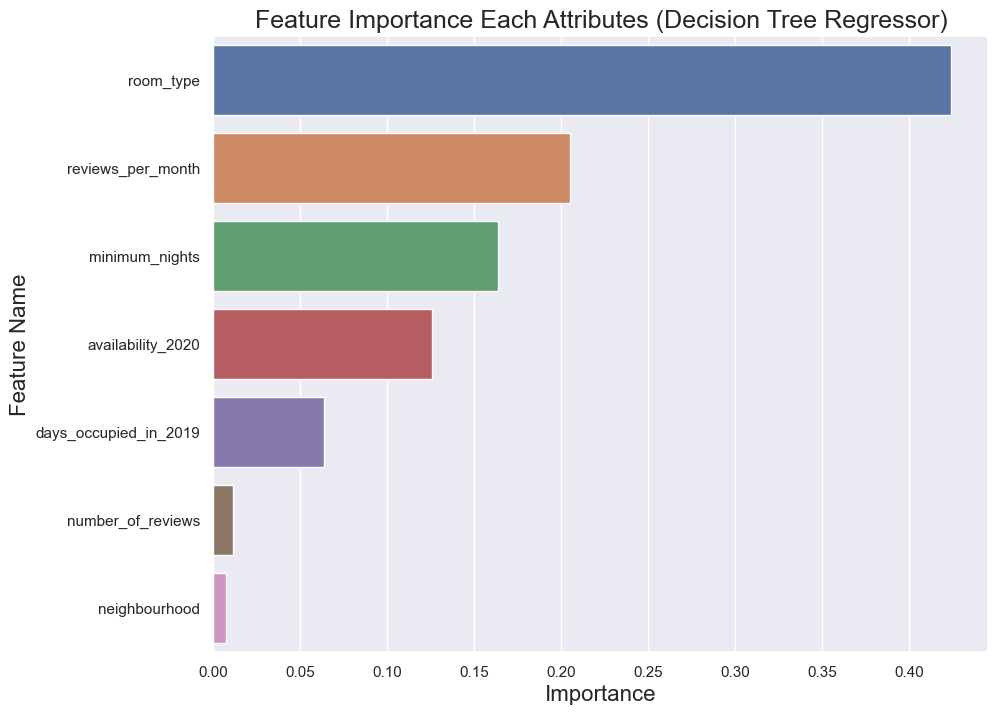

In [62]:
imp_df = pd.DataFrame({"Feature Name" : X_train.columns,
"Importance": dtree.feature_importances_
})

fi = imp_df.sort_values (by="Importance", ascending=False)
fi2 =fi.head (10)

plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


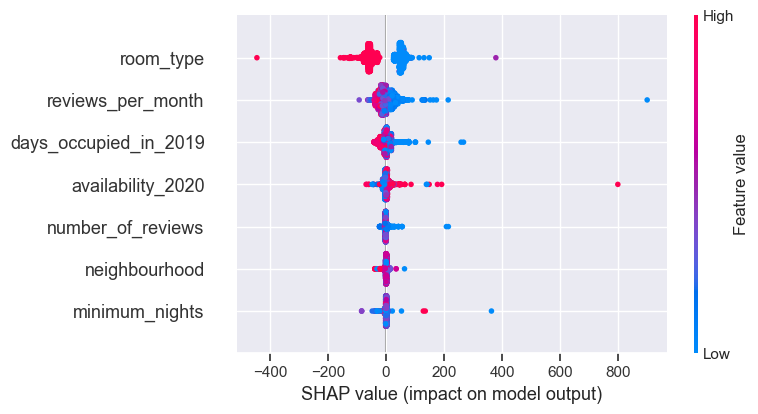

In [63]:

import shap
explainer = shap.TreeExplainer (dtree) 
shap_values = explainer.shap_values (X_test)
shap.summary_plot(shap_values,X_test)

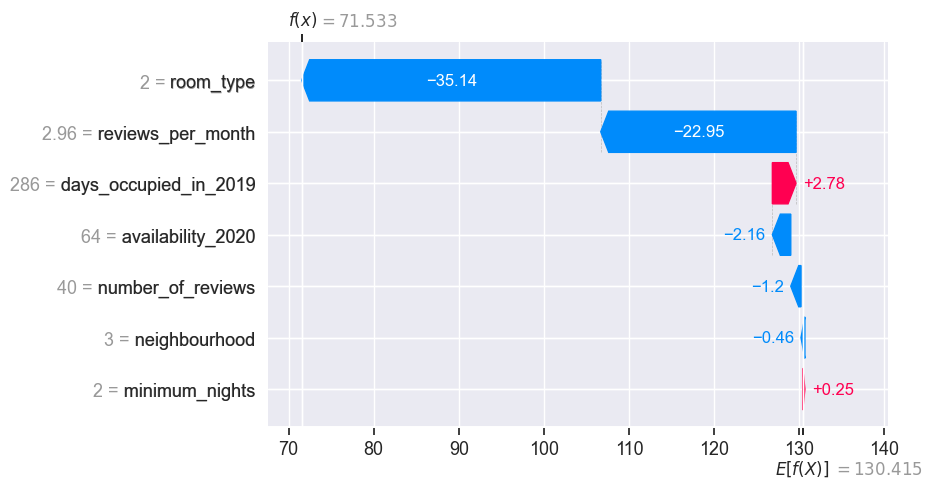

In [64]:

explainer = shap. Explainer (dtree, X_test)
shap_values= explainer(X_test)
shap.plots.waterfall (shap_values[0])

RANDOM FOREST

In [65]:

from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV
# Create a Random Forest Regressor object
rf =RandomForestRegressor()
#Define the hyperparameter grid
param_grid = {
'max_depth': [3, 5, 7, 9], 'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt']
}
# Create a GridSearchCV object
grid_search= GridSearchCV (rf, param_grid, cv=5, scoring='r2')
# Fit the GridSearchCV object to the training data 
grid_search.fit(X_train, y_train)
#Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)


180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\archi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\archi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\archi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0

Best hyperparameters:  {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}


In [79]:
from sklearn. ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=50, max_depth=9, min_samples_split=10,min_samples_leaf=4 ,max_features='sqrt')
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, random_state=50)

In [80]:

from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error 
import math
y_pred = rf.predict(X_test)
mae =metrics.mean_absolute_error (y_test, y_pred) 
mape = mean_absolute_percentage_error (y_test, y_pred)
mse = metrics.mean_squared_error (y_test, y_pred) 
r2=metrics.r2_score (y_test,y_pred)
rmse=math.sqrt(mse)

print('MAE is {}'.format(mae)) 
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse)) 
print('R2 score is {}'.format(r2)) 
print('RMSE score is {}'.format(rmse))

MAE is 62.3940839218048
MAPE is 125339338999918.75
MSE is 22230.675730902833
R2 score is 0.21174201749110577
RMSE score is 149.09954973407142


MAE is 62.473073719994495
MAPE is 123785389671627.81
MSE is 22232.168702597897
R2 score is 0.21168907952059435
RMSE score is 149.10455627712352


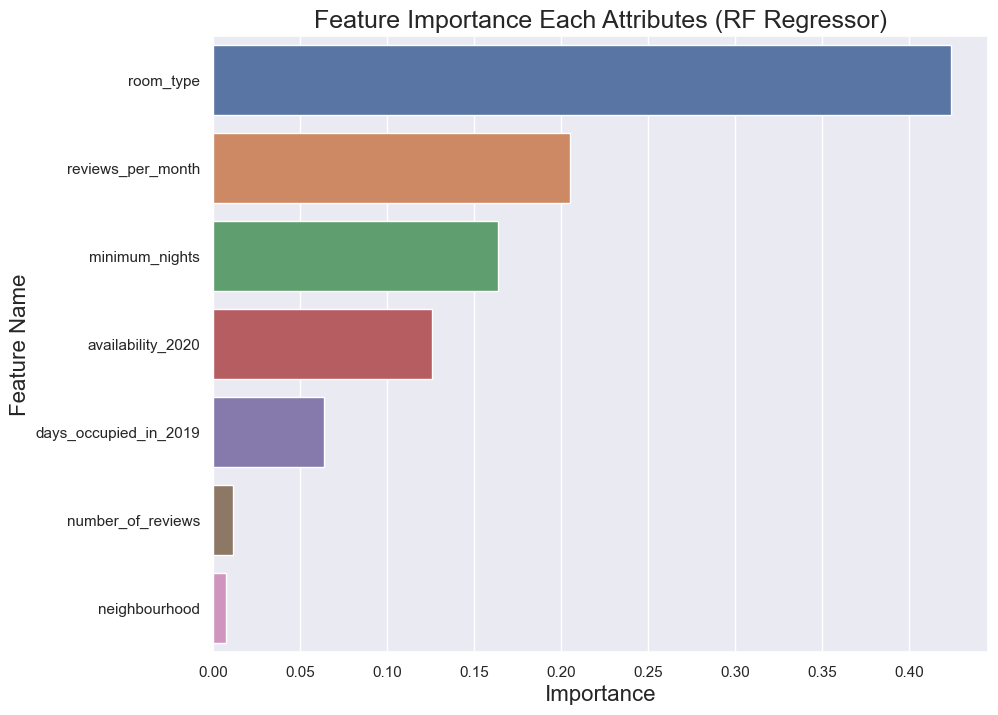

In [81]:
imp_df = pd.DataFrame({"Feature Name" : X_train.columns,
"Importance": rf.feature_importances_
})

fi = imp_df.sort_values (by="Importance", ascending=False)
fi2 =fi.head (10)

plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (RF Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


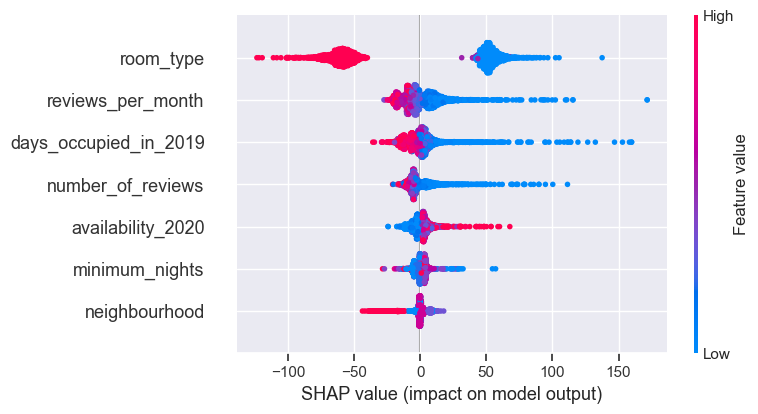

In [82]:

import shap
explainer = shap.TreeExplainer (rf) 
shap_values = explainer.shap_values (X_test)
shap.summary_plot(shap_values,X_test)

100%|===================| 2763/2774 [00:44<00:00]        

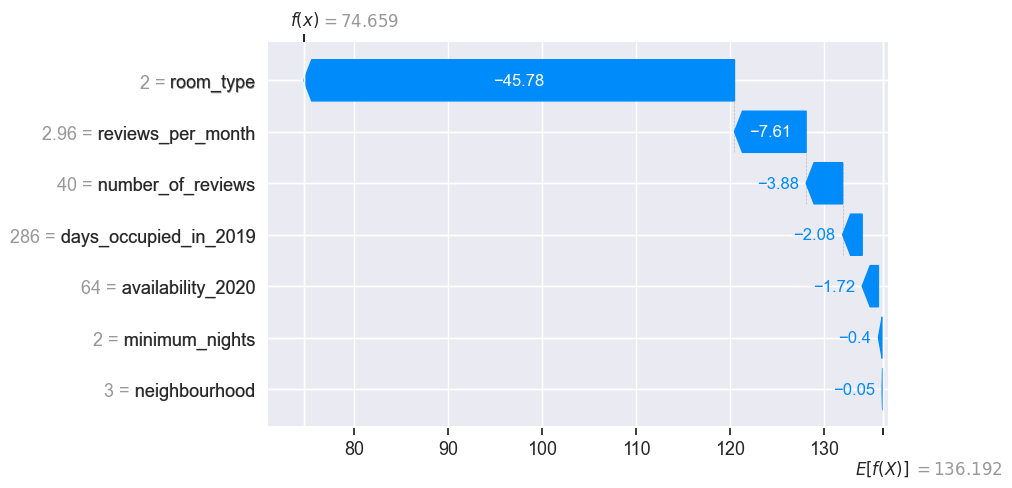

In [83]:
explainer = shap.Explainer (rf, X_test, check_additivity=False)
shap_values= explainer(X_test, check_additivity=False)
shap.plots.waterfall (shap_values[0])

ADABOOST REGRESSOR

In [84]:

from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
# Create an AdaBoost Regressor object
ada = AdaBoostRegressor()
# Define the hyperparameter grid 
param_grid = {'n_estimators': [50, 100, 150, 200],
'learning_rate': [0.01, 0.1, 1],
'loss': ['linear', 'square', 'exponential']
}

# Create a GridSearchCV object
grid_search= GridSearchCV (ada, param_grid, cv=5, scoring='r2')


# Fit the GridSearchCV object to the training data 
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 100}


In [85]:
from sklearn. ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(learning_rate= 0.01, loss='square', n_estimators=100)
ada.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.01, loss='square', n_estimators=100)

In [86]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error 
import math
y_pred = ada.predict(X_test)
mae = metrics.mean_absolute_error (y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 =metrics.r2_score (y_test, y_pred)
rmse = math.sqrt(mse)
print('MAE is {}'.format(mae)) 
print('MAPE is {}'.format(mape)) 
print('MSE is {}'.format(mse)) 
print('R2 score is {}'.format(r2)) 
print('RMSE score is {}'.format(rmse))

MAE is 64.94810327009672
MAPE is 130380493197490.75
MSE is 24253.009133960553
R2 score is 0.14003387566262138
RMSE score is 155.73377647113216


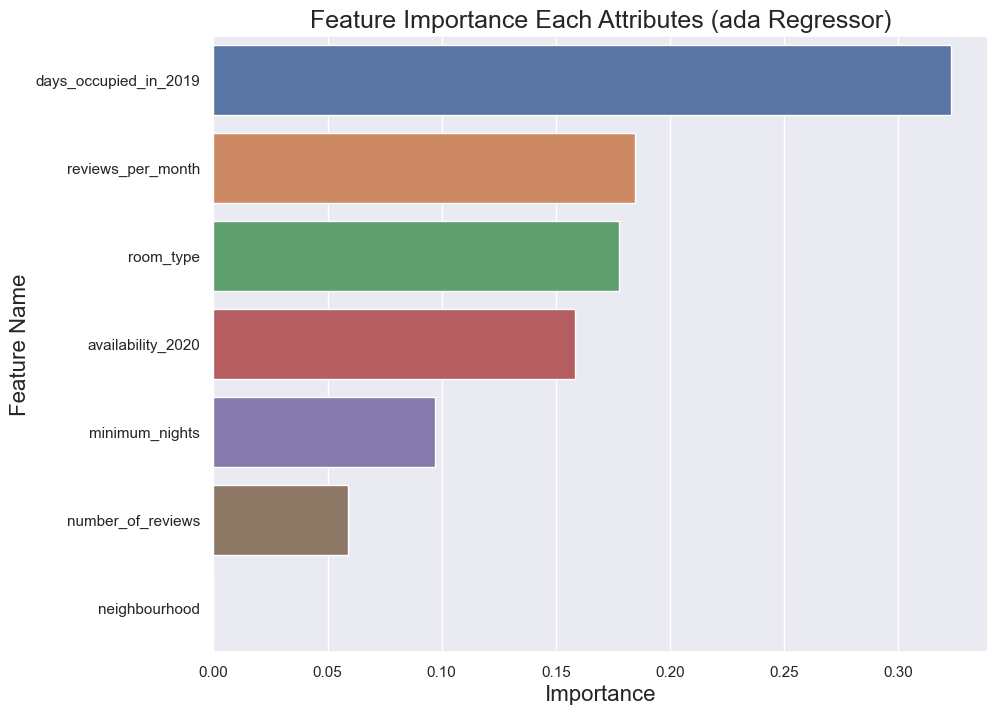

In [87]:
imp_df = pd.DataFrame({"Feature Name" : X_train.columns,
"Importance": ada.feature_importances_
})

fi = imp_df.sort_values (by="Importance", ascending=False)
fi2 =fi.head (10)

plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (ada Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()